In [304]:
from heapq import heapify, heappop, heappush
from collections import defaultdict

with open("aoc_12_input.txt", "r") as f:
#with open("test.txt", "r") as f:
    hmap = f.readlines()

for idx, row in enumerate(hmap):
    hmap[idx] = row.strip()
    if "S" in hmap[idx]:
        s_coord = (idx, hmap[idx].index("S"))
        hmap[idx] = hmap[idx][:s_coord[1]] + "a" + hmap[idx][s_coord[1]+1:]
    if "E" in hmap[idx]:
        e_coord = (idx, hmap[idx].index("E"))
        hmap[idx] = hmap[idx][:e_coord[1]] + "z" + hmap[idx][e_coord[1]+1:]

height = len(hmap)
width = len(hmap[0])
print(f"From {s_coord} -> {e_coord} on a {height} x {width} height map.")

From (20, 0) -> (20, 68) on a 41 x 93 height map.


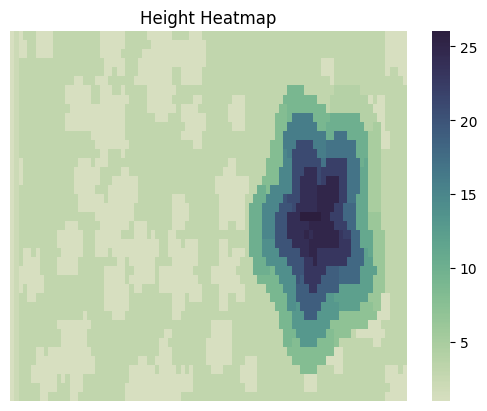

In [305]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
def height_heatmap(character_map):
    ord_map = [[ord(c)-96 for c in row] for row in character_map]
    ax = sns.heatmap(ord_map, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    ax.set_title("Height Heatmap")
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.tick_params(bottom=False, left=False)
    plt.show()


def path_heatmap(title, character_map, path, start):
    values = [[len(path) if (idx == start[0] and jdx == start[1]) else path.index((idx,jdx)) if (idx,jdx) in path else -10 for jdx,c in enumerate(row) ] for idx,row in enumerate(character_map)]
    bx = sns.heatmap(values, vmax=height*11, cmap=sns.color_palette("rocket", as_cmap=True)) # annot=True
    bx.set_title(title)
    bx.set(xticklabels=[])
    bx.set(yticklabels=[])
    bx.tick_params(bottom=False, left=False)
    plt.show()

def score_heatmap(title, character_map, scores):
    values = [[scores[(idx,jdx)] if scores[(idx,jdx)] != float("inf") else 0 for jdx,c in enumerate(row) ] for idx,row in enumerate(character_map)]
    bx = sns.heatmap(values, vmax=height*11, cmap=sns.color_palette("rocket", as_cmap=True)) # annot=True
    bx.set_title(title)
    bx.set(xticklabels=[])
    bx.set(yticklabels=[])
    bx.tick_params(bottom=False, left=False)
    plt.show()


height_heatmap(hmap)


=== A* ===


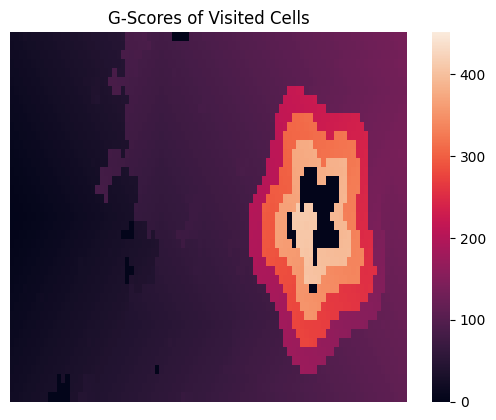

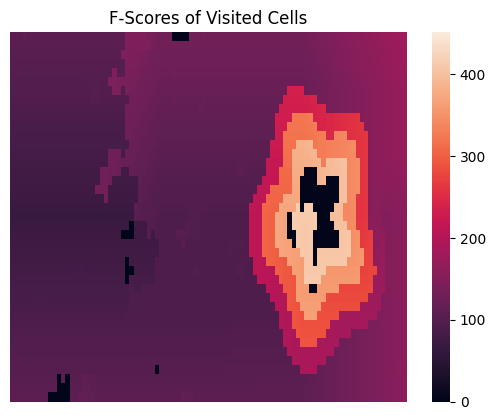

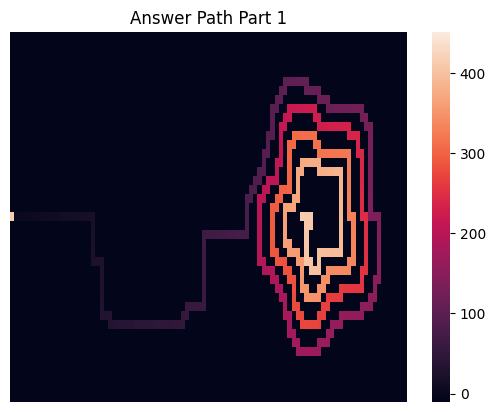

Part 1: 412


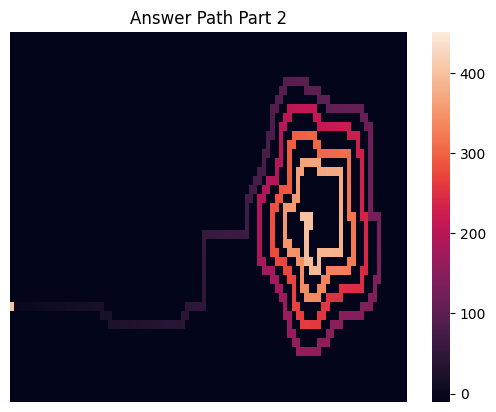

Part 2: 402


In [306]:
def heuristic_manhatten(a):
    return (abs(a[0] - e_coord[0]) + abs(a[1] - e_coord[1]))

def step_possible(a, b):
    A = ord(hmap[a[0]][a[1]])
    B = ord(hmap[b[0]][b[1]])
    return (B <= A) or (A + 1 == B)

def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom:
        current = cameFrom[current]
        total_path.append(current)
    return total_path[::-1]

def a_star(part, display_score_heatmaps_flag):
    if part == 1:
        openSet = [(heuristic_manhatten(s_coord), s_coord)]
    elif part == 2:
        all_Bs = []
        for idx, row in enumerate(hmap):
            all_Bs.append((idx,1))

        openSet = [(heuristic_manhatten(coord), coord) for coord in all_Bs]
    heapify(openSet)
    cameFrom = defaultdict()

    # g(n) is the cost of the cheapest path from start to n currently known
    gScore = defaultdict(lambda : float("inf"))
    
    if part == 1:
        gScore[s_coord] = 0
    elif part == 2:
        for b in all_Bs:
            gScore[b] = 1

    # f(n) = g(n) + h(n) 
    # f(n) is current best guess as to how cheap a path could be, where h(n) the heuristic
    fScore = defaultdict(lambda : float("inf"))
    if part == 1:
        fScore[s_coord] = heuristic_manhatten(s_coord)
    elif part == 2:
        for b in all_Bs:
            fScore[b] = 1 + heuristic_manhatten(b)

    while openSet:
        current = heappop(openSet)[1]
        if current == e_coord:
            if display_score_heatmaps_flag:
                score_heatmap("G-Scores of Visited Cells", hmap, gScore)
                score_heatmap("F-Scores of Visited Cells", hmap, fScore)
            return reconstruct_path(cameFrom, current)

        for vec in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            xx, yy = current[0] + vec[0], current[1] + vec[1]
            neighbor = (xx,yy)
            if (0 <= xx < height) and (0 <= yy < width) and step_possible(current, neighbor):
                tentative_gScore = gScore[current] + 1
                if tentative_gScore < gScore[neighbor]:
                    # this path better than any previous one
                    cameFrom[neighbor] = current
                    gScore[neighbor] = tentative_gScore
                    fScore[neighbor] = tentative_gScore + heuristic_manhatten(neighbor)
                    if neighbor not in openSet:
                        heappush(openSet, (fScore[neighbor], neighbor))
    return -1

print("=== A* ===")
answer_path = a_star(1, True)       
#print(answer_path)
path_heatmap("A*: Answer Path Part 1", hmap, answer_path, s_coord)
print(f"Part 1: {len(answer_path)-1}")

answer_path_part2 = a_star(2, False)     
path_heatmap("A*: Answer Path Part 2", hmap, answer_path_part2, [answer_path_part2[0][0], answer_path_part2[0][1]-1])
print(f"Part 2: {len(answer_path_part2)}")


=== BFS ===
Part 1: The path is 413 cells long, so it would take 412 steps to get to the elevation with the best signal.
Part 2: The path is 403 cells long, so it would take 402 steps to get to the elevation with the best signal.


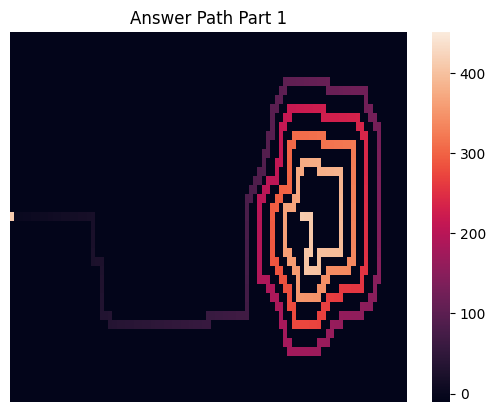

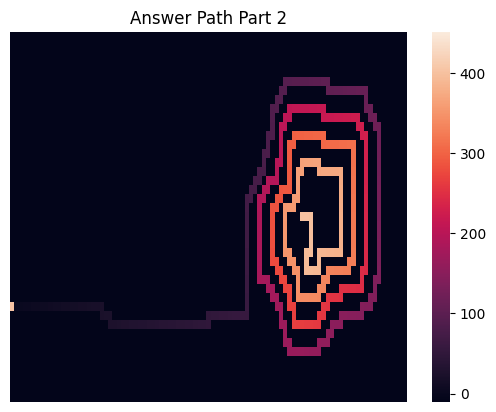

In [308]:
def bfs(start):
    Q = start
    visited = set()
    for s in start:
        visited.add(s)
    cameFrom = defaultdict()
    while Q:
        v = Q.pop(0)
        if v == e_coord:
            return reconstruct_path(cameFrom, v)
        for d in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            xx, yy = v[0] + d[0], v[1] + d[1]
            w = (xx,yy)
            if 0 <= xx < height and 0 <= yy < width and w not in visited and step_possible(v,w):
                visited.add(w)
                cameFrom[w] = v
                Q.append(w)

print("=== BFS ===")
p1 = bfs([s_coord])   
print(f"Part 1: The path is {len(p1)} cells long, so it would take {len(p1)-1} steps to get to the elevation with the best signal.")

A_coords = list(filter(lambda c : c == 'a', hmap))
for idx,row in enumerate(hmap):
    for jdx,c in enumerate(row):
        if c == 'a':
            A_coords.append((idx,jdx))
p2 = bfs(A_coords)
print(f"Part 2: The path is {len(p2)} cells long, so it would take {len(p2)-1} steps to get to the elevation with the best signal.")

path_heatmap("BFS: Answer Path Part 1", hmap, p1, s_coord)
path_heatmap("BFS: Answer Path Part 2", hmap, p2, p2[0])